<a href="https://colab.research.google.com/github/nirajlondhe8/aiml/blob/main/pca/Principal_components_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# <center>Principal components analysis (PCA)</center>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import some data

In [6]:
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing


# X, _ = load_boston(return_X_y=True)
# X = pd.DataFrame(X)

X = fetch_california_housing()

## Scatter plot

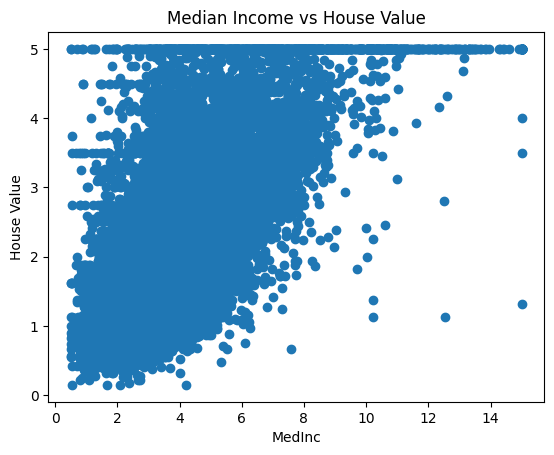

In [8]:
# X.plot(kind='scatter',x=6,y=7, grid=True)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the dataset
X = fetch_california_housing()

# Extract data and target
data = X.data
target = X.target
feature_names = X.feature_names

# Let's plot the first feature (MedInc) against the target (House Value)
plt.scatter(data[:, 0], target)
plt.xlabel(feature_names[0])  # Median Income
plt.ylabel('House Value')
plt.title('Median Income vs House Value')
plt.show()


# Step 1: Normalize the data

<img src="Xnorm.png" alt="Drawing" style="width: 200px;"/>

In [11]:
# Convert to a pandas DataFrame
df = pd.DataFrame(X.data, columns=X.feature_names)

# Add the target to the DataFrame
df['Target'] = X.target

# Get a statistical summary
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [14]:
# mu = X.mean()
# sigma = X.std()

# Add the target (house values) to the DataFrame
df['Target'] = X.target

# Calculate the mean of each column
mean_values = df.mean()
print(mean_values)
sigma = df.std()

MedInc           3.870671
HouseAge        28.639486
AveRooms         5.429000
AveBedrms        1.096675
Population    1425.476744
AveOccup         3.070655
Latitude        35.631861
Longitude     -119.569704
Target           2.068558
dtype: float64


In [17]:
# Normalize the data (subtract the mean and divide by standard deviation)
mu = df.mean()     # Mean of each column
sigma = df.std()   # Standard deviation of each column

# Perform the normalization
df_normalized = (df - mu) / sigma

# Show the first few rows of the normalized data
print(df_normalized.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344709  0.982119  0.628544  -0.153754   -0.974405 -0.049595  1.052523   
1  2.332181 -0.607004  0.327033  -0.263329    0.861418 -0.092510  1.043159   
2  1.782656  1.856137  1.155592  -0.049015   -0.820757 -0.025842  1.038478   
3  0.932945  1.856137  0.156962  -0.049832   -0.766010 -0.050328  1.038478   
4 -0.012881  1.856137  0.344702  -0.032905   -0.759828 -0.085614  1.038478   

   Longitude    Target  
0  -1.327803  2.129580  
1  -1.322812  1.314124  
2  -1.332794  1.258663  
3  -1.337785  1.165072  
4  -1.337785  1.172871  


In [19]:
# Xnorm.std()

# Check the standard deviation of the normalized data
print(df_normalized.std())


MedInc        1.0
HouseAge      1.0
AveRooms      1.0
AveBedrms     1.0
Population    1.0
AveOccup      1.0
Latitude      1.0
Longitude     1.0
Target        1.0
dtype: float64


<Axes: xlabel='Latitude', ylabel='Longitude'>

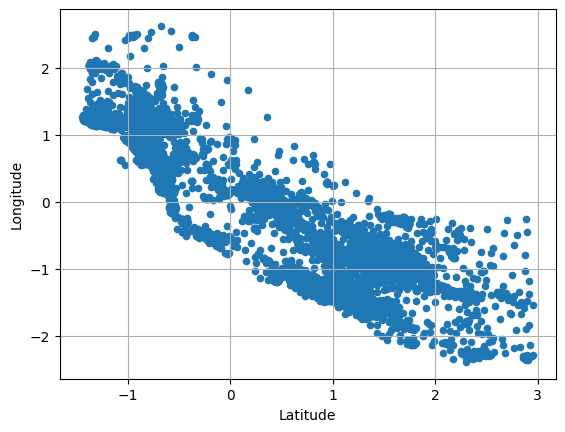

In [20]:
# Xnorm.plot(kind='scatter', x=6, y=7, grid=True)
# Plot a scatter plot of the 6th vs. 7th feature
df_normalized.plot(kind='scatter', x=df_normalized.columns[6], y=df_normalized.columns[7], grid=True)


# Step 2: Perform SVD on the normalized data

In [21]:
from scipy.linalg import svd

U, s, Vt = svd(df_normalized,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

## We can check the decomposition

In [22]:
np.allclose(df_normalized, U@Sigma@V.T)

True

## We can recover the original dataset from the decomposition

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
X = fetch_california_housing().data

# Perform SVD
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

# Convert Sigma to a diagonal matrix
Sigma = np.diag(Sigma)

# Reconstruct the original data from U, Sigma, and V.T
X_recovered = U @ Sigma @ VT

# Check if the reconstructed data is close to the original
print(np.allclose(X, X_recovered))  # This should return True if the reconstruction is correct


True


In [25]:
# Normalize the data (Xnorm = (X - mu) / sigma)
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma

# Perform SVD on the normalized data
U, Sigma, VT = np.linalg.svd(X_norm, full_matrices=False)
Sigma = np.diag(Sigma)

# Reconstruct the normalized data
X_norm_recovered = U @ Sigma @ VT

# Recover the original data from the normalized version
X_recovered = (X_norm_recovered * sigma) + mu

# Check if the recovered data is close to the original
print(np.allclose(X, X_recovered))  # This should return True if everything is correct


True
